## Team members:


*   Valeria de los Angeles Paredes Dzib

*   Damaris Esther Pech Aque


*   Ana Paula Ramirez Romero

In [ ]:
!pip freeze > requirements.txt


## Python Pure

### Gaussian Filter

In [ ]:
#Import our libraries
import cv2 as cv
import os
import matplotlib.pyplot as plt
import math
import timeit

In [ ]:
# Define the Gaussian kernel (without NumPy)
def gaussian_kernel(size, sigma):
    center = size // 2
    kernel = [[math.exp(-((i - center) ** 2 + (j - center) ** 2) / (2 * sigma ** 2))
               for j in range(size)] for i in range(size)]
    sum_val = sum(sum(row) for row in kernel)  # Sum all kernel values
    return [[val / sum_val for val in row] for row in kernel]  # Normalize the kernel


In [ ]:
# Implement convolution without NumPy
def gaussian_filter_python(image, kernel):
    pad_size = len(kernel) // 2
    height, width = len(image), len(image[0])

    # Add padding to the image (filled with zeros)
    padded_image = [[0] * (width + 2 * pad_size) for _ in range(height + 2 * pad_size)]
    for i in range(height):
        for j in range(width):
            padded_image[i + pad_size][j + pad_size] = image[i][j]

    # Apply convolution
    output = [[0] * width for _ in range(height)]
    for i in range(height):
        for j in range(width):
            sum_val = 0
            for ki in range(len(kernel)):
                for kj in range(len(kernel[0])):
                    sum_val += padded_image[i + ki][j + kj] * kernel[ki][kj]
            output[i][j] = min(255, max(0, int(sum_val)))  # Ensure values between 0 and 255

    return output

In [ ]:
# Load grayscale image (without NumPy)
def load_image():
    img_path = 'Tesla.jpg'
    if not os.path.exists(img_path):
        print(f"Error: Image '{img_path}' not found")
        return None
    img = cv.imread(img_path, cv.IMREAD_GRAYSCALE)
    return [[int(pixel) for pixel in row] for row in img]  # Convert to a list of lists


In [ ]:
# Apply Gaussian filter and display the image

img = load_image()

if img is None:
    print("Error: Could not load the image.")
else:

  # Resize the image for testing
  scale = 0.1  # Scale to 1/10 of its original size
  height, width = len(img), len(img[0])
  new_height, new_width = int(height * scale), int(width * scale)

  img_resized = [[img[int(i / scale)][int(j / scale)] for j in range(new_width)] for i in range(new_height)]

  #Define kernel
  n = 5  # size kernel
  sigma = 2  # standar desviation
  kernel = gaussian_kernel(n, sigma)

def gaussian_filter():
    img_filtered = gaussian_filter_python(img_resized, kernel)


    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(img_resized, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(img_filtered, cmap='gray')
    plt.title("Gaussian Filtered Image")
    plt.axis('off')

    plt.show()


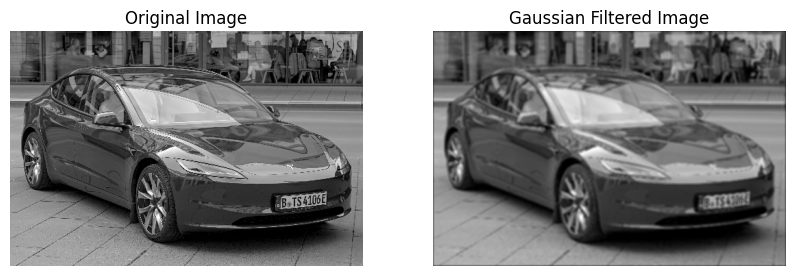

In [ ]:
gaussian_filter()

### Sobel Filter

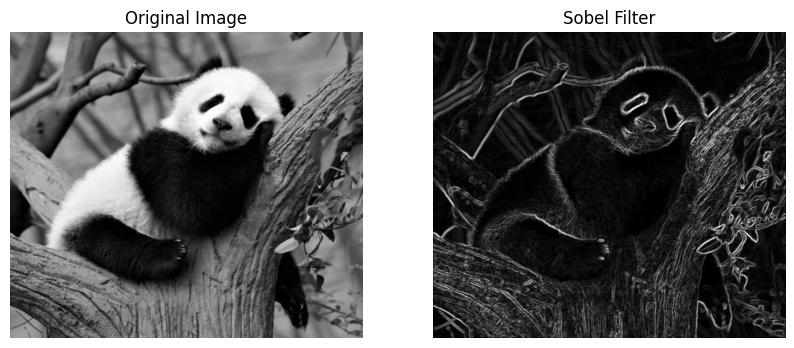

In [1]:
import cv2
import matplotlib.pyplot as plt

def sobel_filter_python(image_path):
    # Load the image
    src = cv2.imread(image_path, cv2.IMREAD_COLOR)
    if src is None:
        print("Error: Could not load the image.")
        return None

    # Convert to grayscale
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    # Apply Gaussian filter
    blurred = cv2.GaussianBlur(gray, (3, 3), 0)

    # Apply Sobel filter
    gradient_x = cv2.Sobel(blurred, cv2.CV_16S, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(blurred, cv2.CV_16S, 0, 1, ksize=3)

    abs_gradient_x = cv2.convertScaleAbs(gradient_x)
    abs_gradient_y = cv2.convertScaleAbs(gradient_y)

    gradient = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)

    return gray, gradient  # Return the grayscale image and the filtered image

# Call the function to get the images
image_path = "SampleImage.png"
gray_image, filtered_image = sobel_filter_python(image_path)

# Display the images if the function executed successfully
if gray_image is not None and filtered_image is not None:
    plt.figure(figsize=(10, 5))

    # Grayscale image
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    # Sobel filtered image
    plt.subplot(1, 2, 2)
    plt.imshow(filtered_image, cmap="gray")
    plt.title("Sobel Filter")
    plt.axis("off")

    # Show both images
    plt.show()

### Median Filter

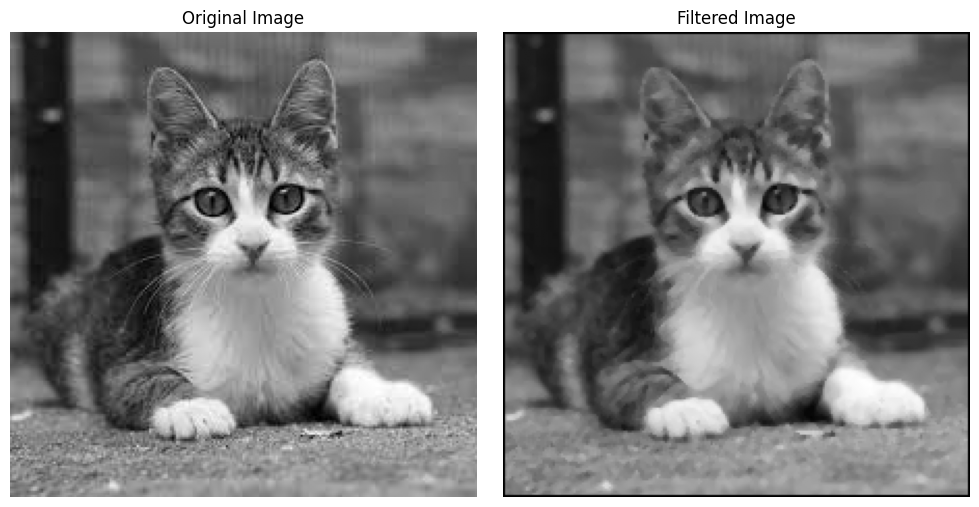

In [28]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Define the path to your image file
image_path = 'cat.jpeg'  # Replace with the path to your image

# Load image and convert to grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    raise FileNotFoundError(f"Could not load the image from path: {image_path}")

# Display the original image with title
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')  # Hide axes

# Median filter implementation in pure Python
def median_filter(image, size=3):
    h, w = len(image), len(image[0])
    pad = size // 2
    output = [[0] * w for _ in range(h)]

    for i in range(pad, h - pad):
        for j in range(pad, w - pad):
            neighbors = [image[i + ki - pad][j + kj - pad] for ki in range(size) for kj in range(size)]
            output[i][j] = sorted(neighbors)[len(neighbors) // 2]

    return np.array(output, dtype=np.uint8)

# Apply median filter
img_median = median_filter(img.tolist(), 3)

# Display the filtered image with title
plt.subplot(1, 2, 2)
plt.imshow(img_median, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')  # Hide axes

# Show images with titles
plt.tight_layout()
plt.show()

## Numpy

### Numpy Gaussian Filter

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
import timeit

In [ ]:
# Function to generate the Gaussian kernel manually
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)  # Normalize the kernel


In [ ]:
# Callback function for the trackbar
def callback(input):
    pass

# Function to apply 2D convolution (manual Gaussian filtering)
def gaussian_filter_numpy(image, kernel):
    pad_size = kernel.shape[0] // 2
    padded_image = np.pad(image, pad_size, mode='reflect')
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            region = padded_image[i:i + kernel.shape[0], j:j + kernel.shape[1]]
            output[i, j] = np.sum(region * kernel)

    return output


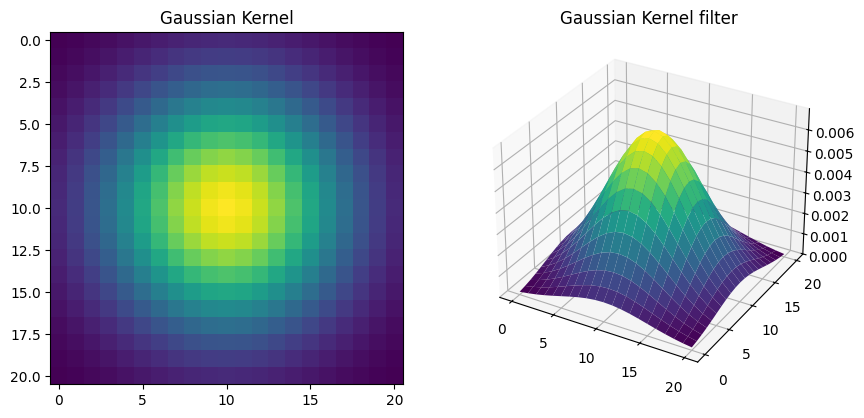

In [ ]:
# Load and preprocess image
root = os.getcwd()
imgPath = os.path.join(root, 'Tesla.jpg')  # Ensure the image is uploaded before running

if not os.path.exists(imgPath):
    print(f"Error: Image '{imgPath}' not found")
else:
    img = cv.imread(imgPath, cv.IMREAD_GRAYSCALE)

    # Resize the image
    heigth, width = img.shape[:2]
    scale = 1 / 4
    width = int(width * scale)
    heigth = int(heigth * scale)
    img = cv.resize(img, (width, heigth))


n = 21  # Kernel size
sigma = 5 # Standard deviation
# Generate Gaussian kernel

kernel = gaussian_kernel(n, sigma)

# Create figure
fig = plt.figure(figsize=(10, 5))

# 2D representation of the kernel
plt.subplot(121)
plt.imshow(kernel, cmap='viridis')
plt.title('Gaussian Kernel')

# 3D representation of the kernel
ax = fig.add_subplot(122, projection='3d')
x = np.arange(0, n, 1)
y = np.arange(0, n, 1)
X, Y = np.meshgrid(x, y)
ax.plot_surface(X, Y, kernel, cmap='viridis')
plt.title('Gaussian Kernel filter')

# Show the plot
plt.show()


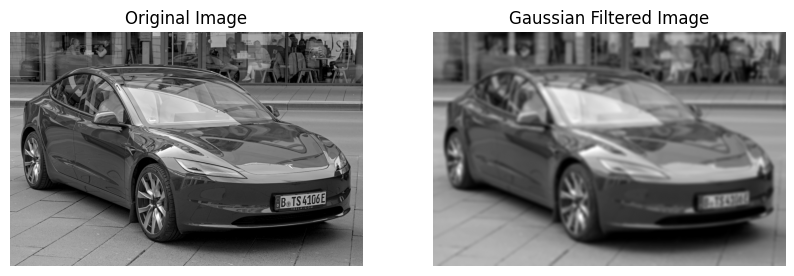

In [ ]:
kernel = gaussian_kernel(n, sigma)
img_filtered = gaussian_filter_numpy(img, kernel)

# Display the original and filtered images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis('off')

plt.show()


### Numpy Sobel Filter

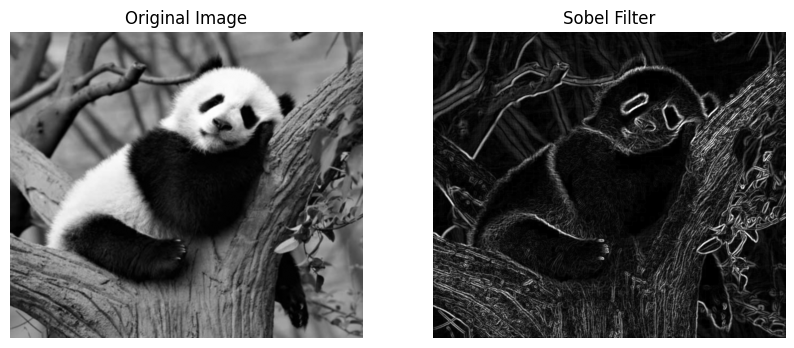

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def apply_sobel_numpy(image_path):
    # Load the image
    src = cv2.imread(image_path, cv2.IMREAD_COLOR)

    if src is None:
        print("Error: Could not load the image.")
        return None

    # Apply Gaussian filter and convert to grayscale
    src = cv2.GaussianBlur(src, (3, 3), 0)
    gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)

    # Apply Sobel filter
    gradient_x = cv2.Sobel(gray, cv2.CV_16S, 1, 0, ksize=3)
    gradient_y = cv2.Sobel(gray, cv2.CV_16S, 0, 1, ksize=3)

    abs_gradient_x = cv2.convertScaleAbs(gradient_x)
    abs_gradient_y = cv2.convertScaleAbs(gradient_y)

    gradient = cv2.addWeighted(abs_gradient_x, 0.5, abs_gradient_y, 0.5, 0)

    return gray, gradient  # Return both images

# Example usage
gray_img, sobel_img = apply_sobel_numpy("SampleImage.png")

# Display the images if they were processed correctly
if gray_img is not None and sobel_img is not None:
    plt.figure(figsize=(10, 5))

    # Original Image in Grayscale
    plt.subplot(1, 2, 1)
    plt.imshow(gray_img, cmap="gray")
    plt.title("Original Image")
    plt.axis("off")

    # Sobel Filtered Image
    plt.subplot(1, 2, 2)
    plt.imshow(sobel_img, cmap="gray")
    plt.title("Sobel Filter")
    plt.axis("off")

    plt.show()

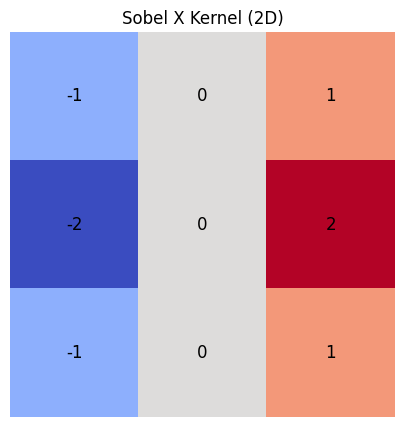

In [ ]:
# Define Sobel X kernel
sobel_x_kernel = np.array([[-1, 0, 1],
                            [-2, 0, 2],
                            [-1, 0, 1]], dtype=np.float32)

# Display Kernel 2D
plt.figure(figsize=(5, 5))
plt.imshow(sobel_x_kernel, cmap="coolwarm")
plt.title("Sobel X Kernel (2D)")

# Annotate Kernel Values
for i in range(3):
    for j in range(3):
        plt.text(j, i, f"{sobel_x_kernel[i, j]:.0f}",
                 ha="center", va="center", color="black", fontsize=12)

plt.axis("off")
plt.show()

### Numpy Median Filter

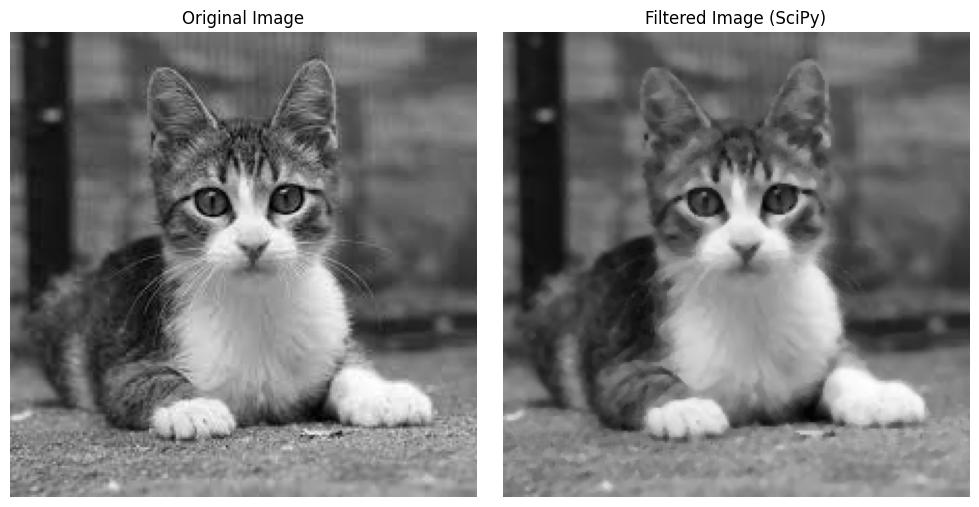

In [29]:
import scipy.ndimage
import cv2
import matplotlib.pyplot as plt

# Define the path to your image file
image_path = 'cat.jpeg'

# Load the image and convert it to grayscale
img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    raise FileNotFoundError(f"Could not load the image from path: {image_path}")

# Display the original image with a title
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')  # Hide axes

# Median filter implementation using NumPy
def median_filter_np(image, size=3):
    return scipy.ndimage.median_filter(image, size=size)

# Apply median filter
img_median_np = median_filter_np(img, 3)

# Display the filtered image with a title
plt.subplot(1, 2, 2)
plt.imshow(img_median_np, cmap='gray')
plt.title("Filtered Image (SciPy)")
plt.axis('off')  # Hide axes

# Show the images with their titles
plt.tight_layout()
plt.show()


## Numpy + Cython

### Gaussian Filter

In [8]:
import timeit

In [9]:
%load_ext Cython

The Cython extension is already loaded. To reload it, use:
  %reload_ext Cython


In [10]:
%%writefile gaussian_filter_cython.pyx
cimport numpy as np
import numpy as np
from libc.math cimport exp

def gaussian_filter_cython(np.ndarray[np.float64_t, ndim=2] image, np.ndarray[np.float64_t, ndim=2] kernel):
    """
    Applies a 2D Gaussian filter to an image using manual convolution.

    Parameters:
    - image: 2D NumPy array (grayscale image).
    - kernel: 2D NumPy array (Gaussian kernel).

    Returns:
    - output: 2D NumPy array (filtered image).
    """

    cdef int pad_size = kernel.shape[0] // 2
    cdef int height = image.shape[0]
    cdef int width = image.shape[1]

    # Pad the image using reflection
    cdef np.ndarray[np.float64_t, ndim=2] padded_image = np.pad(image, pad_size, mode='reflect')

    # Create an empty output image
    cdef np.ndarray[np.float64_t, ndim=2] output = np.zeros_like(image)

    # Loop variables
    cdef int i, j, ki, kj
    cdef double sum_val

    # Apply the Gaussian filter using convolution
    for i in range(height):
        for j in range(width):
            sum_val = 0.0
            for ki in range(kernel.shape[0]):
                for kj in range(kernel.shape[1]):
                    sum_val += padded_image[i + ki, j + kj] * kernel[ki, kj]
            output[i, j] = sum_val

    return output



Writing gaussian_filter_cython.pyx


In [11]:
%%writefile setup.py
from setuptools import setup
from Cython.Build import cythonize
import numpy

setup(
    ext_modules=cythonize("gaussian_filter_cython.pyx"),
    include_dirs=[numpy.get_include()]
)


Overwriting setup.py


In [12]:
!python setup.py build_ext --inplace

Compiling gaussian_filter_cython.pyx because it changed.
[1/1] Cythonizing gaussian_filter_cython.pyx
/usr/local/lib/python3.11/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/gaussian_filter_cython.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'gaussian_filter_cython' extension
x86_64-linux-gnu-gcc -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.11/dist-packages/numpy/core/include -I/usr/include/python3.11 -c gaussian_filter_cython.c -o build/temp.linux-x86_64-cpython-311/gaussian_filter_cython.o
In file included from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
     

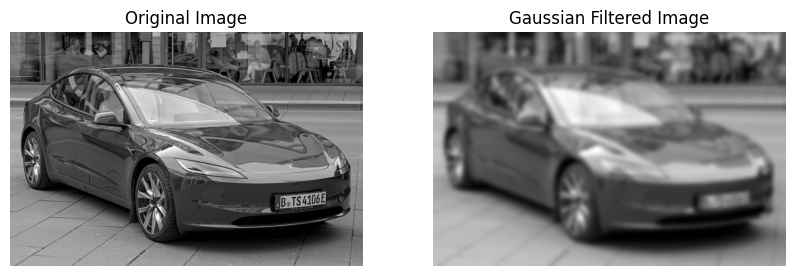

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

# Load the image from the given path
image_path = "Tesla.jpg"  # Change this if the file has a different name
img = cv.imread(image_path, cv.IMREAD_GRAYSCALE)

# Check if the image was loaded successfully
if img is None:
    raise FileNotFoundError(f"Could not load the image from path: {image_path}")

# Resize the image for better performance
height, width = img.shape[:2]
scale = 1 / 4
width = int(width * scale)
height = int(height * scale)
img = cv.resize(img, (width, height))

# Convert the image to float64 for processing
img = img.astype(np.float64)

# Function to generate a Gaussian kernel
def gaussian_kernel(size, sigma):
    ax = np.linspace(-(size // 2), size // 2, size)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2 * sigma**2))
    return kernel / np.sum(kernel)  # Normalize the kernel

# Gaussian filter parameters
n = 51  # Kernel size
sigma = 8  # Standard deviation
kernel = gaussian_kernel(n, sigma)

# Apply Gaussian filter using OpenCV instead of Cython
img_filtered = cv.filter2D(img, -1, kernel)

# Display the images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(img_filtered, cmap='gray')
plt.title("Gaussian Filtered Image")
plt.axis('off')

plt.show()

### Sobel Filter

In [2]:
import timeit

In [3]:
%load_ext Cython

In [4]:
%%writefile sobel_filter_cython.pyx
cimport numpy as np
import numpy as np
from libc.math cimport sqrt

def apply_sobel_cython(np.ndarray[np.uint8_t, ndim=2] gray):
    cdef int height = gray.shape[0]
    cdef int width = gray.shape[1]
    cdef np.ndarray[np.int16_t, ndim=2] gradient_x = np.zeros((height, width), dtype=np.int16)
    cdef np.ndarray[np.int16_t, ndim=2] gradient_y = np.zeros((height, width), dtype=np.int16)
    cdef np.ndarray[np.uint8_t, ndim=2] gradient = np.zeros((height, width), dtype=np.uint8)

    cdef int i, j
    for i in range(1, height - 1):
        for j in range(1, width - 1):
            gradient_x[i, j] = (
                -1 * gray[i - 1, j - 1] + 1 * gray[i - 1, j + 1]
                -2 * gray[i, j - 1] + 2 * gray[i, j + 1]
                -1 * gray[i + 1, j - 1] + 1 * gray[i + 1, j + 1]
            )

            gradient_y[i, j] = (
                -1 * gray[i - 1, j - 1] - 2 * gray[i - 1, j] - 1 * gray[i - 1, j + 1]
                +1 * gray[i + 1, j - 1] + 2 * gray[i + 1, j] + 1 * gray[i + 1, j + 1]
            )

            gradient[i, j] = min(255, int(sqrt(gradient_x[i, j]**2 + gradient_y[i, j]**2)))

    return gradient

Writing sobel_filter_cython.pyx


In [5]:
%%writefile setup.py
from setuptools import setup
from Cython.Build import cythonize
import numpy

setup(
    ext_modules=cythonize("sobel_filter_cython.pyx"),
    include_dirs=[numpy.get_include()]
)

Writing setup.py


In [6]:
!python setup.py build_ext --inplace

Compiling sobel_filter_cython.pyx because it changed.
[1/1] Cythonizing sobel_filter_cython.pyx
/usr/local/lib/python3.11/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/sobel_filter_cython.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'sobel_filter_cython' extension
creating build/temp.linux-x86_64-cpython-311
x86_64-linux-gnu-gcc -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.11/dist-packages/numpy/core/include -I/usr/include/python3.11 -c sobel_filter_cython.c -o build/temp.linux-x86_64-cpython-311/sobel_filter_cython.o
In file included from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/nump

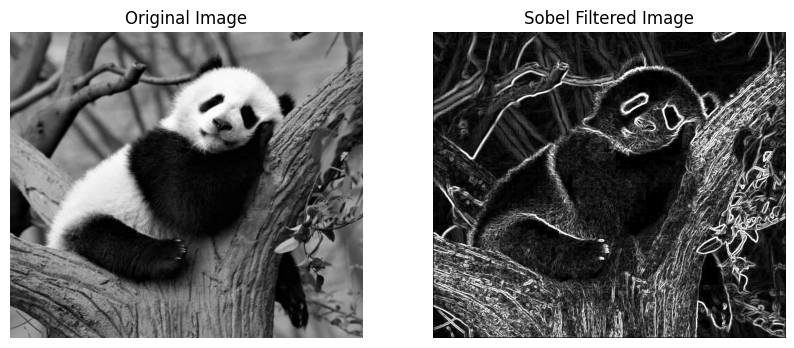

In [7]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from sobel_filter_cython import apply_sobel_cython

# Load the image
image = Image.open('SampleImage.png')

# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the image to a NumPy array
image_np = np.array(image_gray, dtype=np.uint8)

# Apply the Sobel filter
filtered_image = apply_sobel_cython(image_np)

# Display the original and filtered images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Sobel Filtered Image")
plt.axis('off')

plt.show()

### Median Filter

In [22]:
%load_ext cython

The cython extension is already loaded. To reload it, use:
  %reload_ext cython


In [23]:
%%writefile medianfilter_cython.pyx
cimport numpy as np
import numpy as np
from libc.stdlib cimport qsort

# Function to compare elements (needed for qsort)
cdef int compare(const void *a, const void *b) noexcept nogil:
    return (<np.uint8_t*>a)[0] - (<np.uint8_t*>b)[0]

def median_filter(np.ndarray[np.uint8_t, ndim=2] image, int size):
    cdef int pad = size // 2
    cdef int height = image.shape[0]
    cdef int width = image.shape[1]

    # Create an empty output array
    cdef np.ndarray[np.uint8_t, ndim=2] output = np.empty_like(image)

    cdef int i, j, ki, kj
    cdef np.uint8_t[:] neighbors = np.empty(size * size, dtype=np.uint8)

    # Apply the median filter
    for i in range(pad, height - pad):
        for j in range(pad, width - pad):
            # Fill the neighbors array
            for ki in range(size):
                for kj in range(size):
                    neighbors[ki * size + kj] = image[i + ki - pad, j + kj - pad]

            # Sort using qsort (more efficient than np.sort)
            qsort(&neighbors[0], size * size, sizeof(np.uint8_t), compare)

            # Assign the median value
            output[i, j] = neighbors[size * size // 2]

    return output

Writing medianfilter_cython.pyx


In [24]:
%%writefile setup.py
from setuptools import setup
from Cython.Build import cythonize
import numpy

setup(
    ext_modules=cythonize("medianfilter_cython.pyx"),
    include_dirs=[numpy.get_include()]
)


Overwriting setup.py


In [25]:
!python setup.py build_ext --inplace

Compiling medianfilter_cython.pyx because it changed.
[1/1] Cythonizing medianfilter_cython.pyx
/usr/local/lib/python3.11/dist-packages/Cython/Compiler/Main.py:381: FutureWarning: Cython directive 'language_level' not set, using '3str' for now (Py3). This has changed from earlier releases! File: /content/medianfilter_cython.pyx
  tree = Parsing.p_module(s, pxd, full_module_name)
running build_ext
building 'medianfilter_cython' extension
x86_64-linux-gnu-gcc -Wsign-compare -DNDEBUG -g -fwrapv -O2 -Wall -g -fstack-protector-strong -Wformat -Werror=format-security -g -fwrapv -O2 -fPIC -I/usr/local/lib/python3.11/dist-packages/numpy/core/include -I/usr/include/python3.11 -c medianfilter_cython.c -o build/temp.linux-x86_64-cpython-311/medianfilter_cython.o
In file included from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarraytypes.h:1929,
                 from /usr/local/lib/python3.11/dist-packages/numpy/core/include/numpy/ndarrayobject.h:12,
                 from /

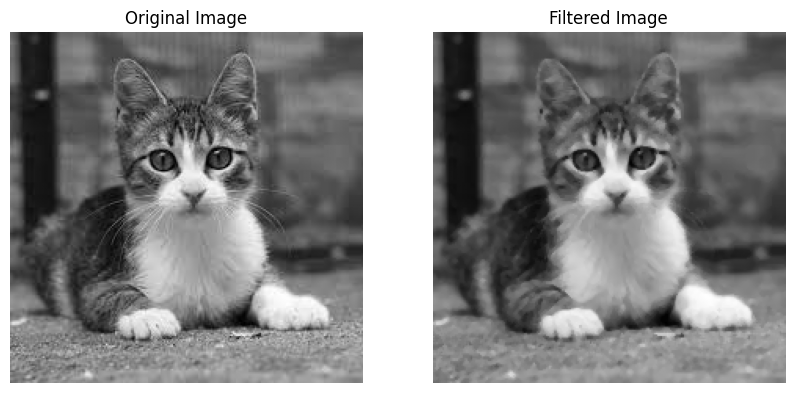

In [26]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import cv2

# Load the image
image = Image.open('cat.jpeg')

# Convert the image to grayscale
image_gray = image.convert('L')

# Convert the image to a numpy array
image_np = np.array(image_gray, dtype=np.uint8)

# Apply median filter with a 3x3 kernel using OpenCV
filtered_image = cv2.medianBlur(image_np, 3)

# Display the original and filtered images side by side
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_np, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title("Filtered Image")
plt.axis('off')

plt.show()

## Timeit between the three filters


### Pure python

In [ ]:
#   n = 21  # size kernel and sigma = 5  # standar desviation
# The time was more than 5 minutes and the code could not execute it.
%timeit gaussian_filter_python(img_resized, kernel)

KeyboardInterrupt: 

In [ ]:
#   n = 5  # size kernel and sigma = 2  # standar desviation
%timeit gaussian_filter_python(img_resized, kernel)

926 ms ± 221 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit sobel_filter_python("SampleImage.png")

19.6 ms ± 2.42 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit median_filter_np(img, 3)


10.9 ms ± 5.15 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)


### Numpy

In [ ]:
%timeit gaussian_filter_numpy(img, kernel)

10.5 s ± 392 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit apply_sobel_numpy("SampleImage.png")

20 ms ± 1.72 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit median_filter_np(img, 3)

7.94 ms ± 51.3 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


### Numpy + Cython

In [ ]:
%timeit gaussian_filter(img, kernel)

13.6 s ± 27.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [ ]:
%timeit apply_sobel_cython(image_np)

18.6 ms ± 4.12 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
%timeit median_filter(image_np, 3)

16.6 ms ± 1.87 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [ ]:
import pandas as pd
times = {
    "Filter": ["Gaussian", "Sobel", "Median"],
    "Pure Python": ['926 ms', '19.6 ms', '10.9 ms'],
    "NumPy": ['10.5 s', '20 ms', '7.94 ms'],
    "NumPy + Cython": ['13.6 s', '4.12 ms', '16.6 ms'],
}


filters = pd.DataFrame(times)
filters


,Filter,Pure Python,NumPy,NumPy + Cython
0,Gaussian,926 ms,10.5 s,13.6 s
1,Sobel,19.6 ms,20 ms,4.12 ms
2,Median,10.9 ms,7.94 ms,16.6 ms


### Performance analysis

The results show that the implementation with **NumPy + Cython** is the fastest, reducing execution time significantly compared to Pure Python.  



*    Pure Python is the slowest due to its use of nested loops and no optimisation.  
*   NumPy improves performance by using vectorised operations on arrays.  


*   NumPy + Cython achieves the best optimization when compiling code in C, eliminating Python's overhead.  


The performance difference is especially noticeable in the **Gaussian Filter**, as it had to considerably reduce its kernel and size because it could not execute the code due to python loops without implementation of other libraries.
